<a href="https://colab.research.google.com/github/luida-M/Predicci-n-de-Ataques-Cardiacos-en-India/blob/main/Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Montar Google Drive en Colab y importar librerias**

In [26]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Instalar librerías necesarias
!pip install pandas==2.2.2 --quiet
!pip install --upgrade gspread --quiet

#Importar librerías
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Cargar dataset desde Google Sheets
sheet_url = "https://docs.google.com/spreadsheets/d/1NM3fGIVkABvM7Odt52DS9RFy7u6rwi10Vtrln3Y4nes/export?format=csv"
df = pd.read_csv(sheet_url)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Exploración de datos**

In [27]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas:")
df.head()

Primeras filas:


,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [28]:
# Imprime la info del DataSet
print("\nInfo del dataset:")
df.info()


Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level           

In [29]:
# Imprime los valores nulos de las columnas
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64


# **Limpieza y exploración de datos**

In [30]:
#Visualización de los nombres de las  columnas para ver si son cual de las columnas no es relevantes:
print(df.columns)

Index(['Patient_ID', 'State_Name', 'Age', 'Gender', 'Diabetes', 'Hypertension',
       'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity',
       'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
       'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure',
       'Family_History', 'Stress_Level', 'Healthcare_Access',
       'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income',
       'Health_Insurance', 'Heart_Attack_Risk'],
      dtype='object')


In [31]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Reemplazar valores cero en 'Triglyceride_Level' por NaN
df['Triglyceride_Level'].replace(0, np.nan, inplace=True)

# Imputar valores faltantes con la media SOLO en columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


<ipython-input-31-d5ad4b094781>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Triglyceride_Level'].replace(0, np.nan, inplace=True)


In [32]:
# Crear categorías de edad
bins = [0, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '60+']
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Crear variable de riesgo cardiovascular
df['Heart_Risk'] = ((df['Cholesterol_Level'] > 200) |
                     (df['Systolic_BP'] > 140) |
                     (df['Diastolic_BP'] > 90)).astype(int)


In [38]:
# Estadísticas descriptivas
df.describe()

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk,Heart_Risk
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.00000
mean,5000.50000,49.394900,0.092900,0.24690,0.303700,0.301400,0.352800,0.595800,5.021700,224.753000,...,0.403600,0.311300,5.518800,0.311000,0.152500,206.383400,1.022062e+06,0.344700,0.300700,0.89750
std,2886.89568,17.280301,0.290307,0.43123,0.459878,0.458889,0.477865,0.490761,3.156394,43.359172,...,0.490644,0.463048,2.866264,0.462926,0.359523,112.391711,5.605978e+05,0.475294,0.458585,0.30332
min,1.00000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.035300e+04,0.000000,0.000000,0.00000
25%,2500.75000,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,187.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,110.000000,5.357838e+05,0.000000,0.000000,1.00000
50%,5000.50000,49.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,226.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,206.000000,1.021383e+06,0.000000,0.000000,1.00000
75%,7500.25000,64.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,8.000000,262.000000,...,1.000000,1.000000,8.000000,1.000000,0.000000,304.000000,1.501670e+06,1.000000,1.000000,1.00000
max,10000.00000,79.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,299.000000,...,1.000000,1.000000,10.000000,1.000000,1.000000,399.000000,1.999714e+06,1.000000,1.000000,1.00000


from matplotlib import pyplot as plt
_df_0['Patient_ID'].plot(kind='hist', bins=20, title='Patient_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Diabetes'].plot(kind='hist', bins=20, title='Diabetes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Hypertension'].plot(kind='hist', bins=20, title='Hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Patient_ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Age', y='Diabetes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Diabetes', y='Hypertension', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Hypertension', y='Obesity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Emergency_Response_Time']
  ys = series['Patient_ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Emergency_Response_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Emergency_Response_Time')
_ = plt.ylabel('Patient_ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Emergency_Response_Time']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Emergency_Response_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Emergency_Response_Time')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Emergency_Response_Time']
  ys = series['Diabetes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Emergency_Response_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Emergency_Response_Time')
_ = plt.ylabel('Diabetes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Emergency_Response_Time']
  ys = series['Hypertension']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Emergency_Response_Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Emergency_Response_Time')
_ = plt.ylabel('Hypertension')

from matplotlib import pyplot as plt
_df_12['Patient_ID'].plot(kind='line', figsize=(8, 4), title='Patient_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Diabetes'].plot(kind='line', figsize=(8, 4), title='Diabetes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Hypertension'].plot(kind='line', figsize=(8, 4), title='Hypertension')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Análisis Exploratorio de Datos (EDA):**

**Matriz de correlación a partir de los datos numéricos de un DataFrame**

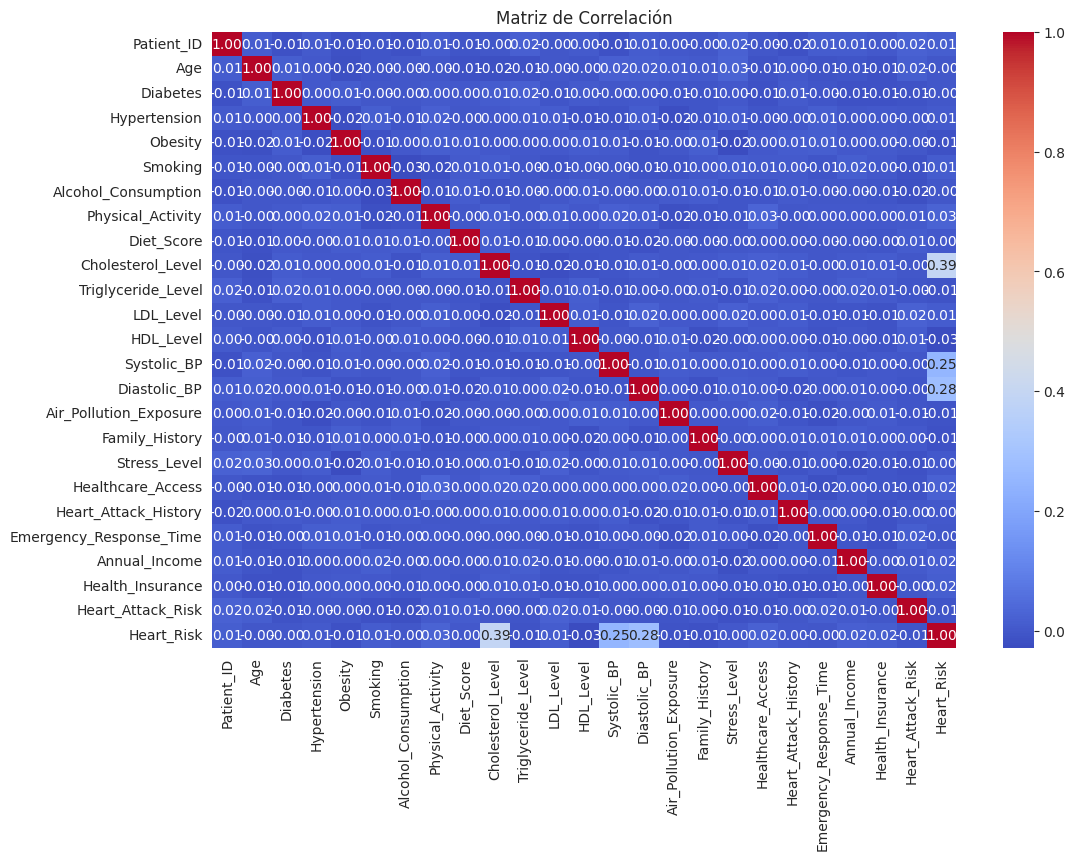

✅ Imagen guardada en: imagenes/matriz_correlacion.png
📂 Archivos en la carpeta: ['Boxplot_de_colesterol_por_categoría de_edad.png', 'Categoria_edad.png', 'Scatterplot_edad_vs_Colesterol.png', 'matriz_correlacion.png', 'Mapa_de_calor.png', 'Histograma_edad.png', 'Boxplot_de_colesterol_por_categoría_de_edad.png']


In [33]:
# Crear carpeta de destino si no existe
output_folder = "imagenes"
os.makedirs(output_folder, exist_ok=True)  # Crea la carpeta si no existe

# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "matriz_correlacion.png")

# Análisis exploratorio de datos (EDA)
numeric_df = df.select_dtypes(include=['number'])  # Solo columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Mostrar la imagen
plt.show()

# Verificar si la imagen se guardó correctamente
print(f"✅ Imagen guardada en: {image_path}")

# Mostrar archivos dentro de la carpeta "imagenes"
print("📂 Archivos en la carpeta:", os.listdir(output_folder))


**Hstograma: Muestra la distribución de las edades**

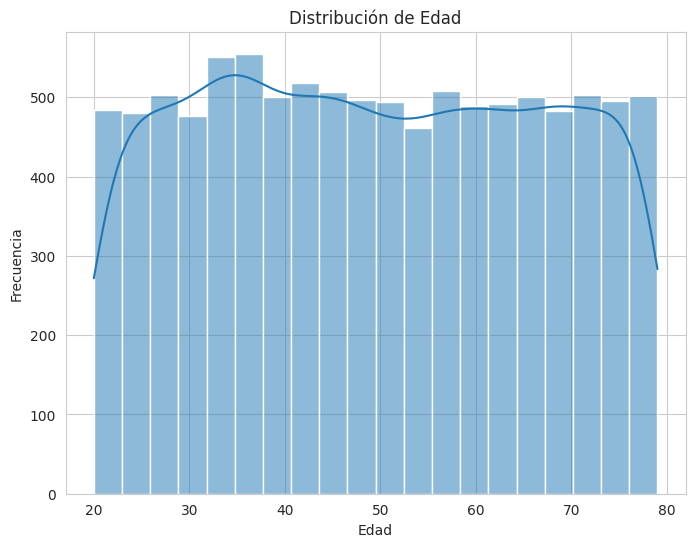

✅ Imagen guardada en: imagenes/Histograma_edad.png
📂 Archivos en la carpeta: ['Boxplot_de_colesterol_por_categoría de_edad.png', 'Categoria_edad.png', 'Scatterplot_edad_vs_Colesterol.png', 'matriz_correlacion.png', 'Mapa_de_calor.png', 'Histograma_edad.png', 'Boxplot_de_colesterol_por_categoría_de_edad.png']


In [34]:
# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Histograma_edad.png")

# Histograma de edad
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Mostrar la imagen
plt.show()

# Verificar si la imagen se guardó correctamente
print(f"✅ Imagen guardada en: {image_path}")

# Mostrar archivos dentro de la carpeta "imagenes"
print("📂 Archivos en la carpeta:", os.listdir(output_folder))


<ipython-input-50-8e2fcdc0be7c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Category', y='Cholesterol_Level', data=df, width=0.6, linewidth=2.5, palette="coolwarm")


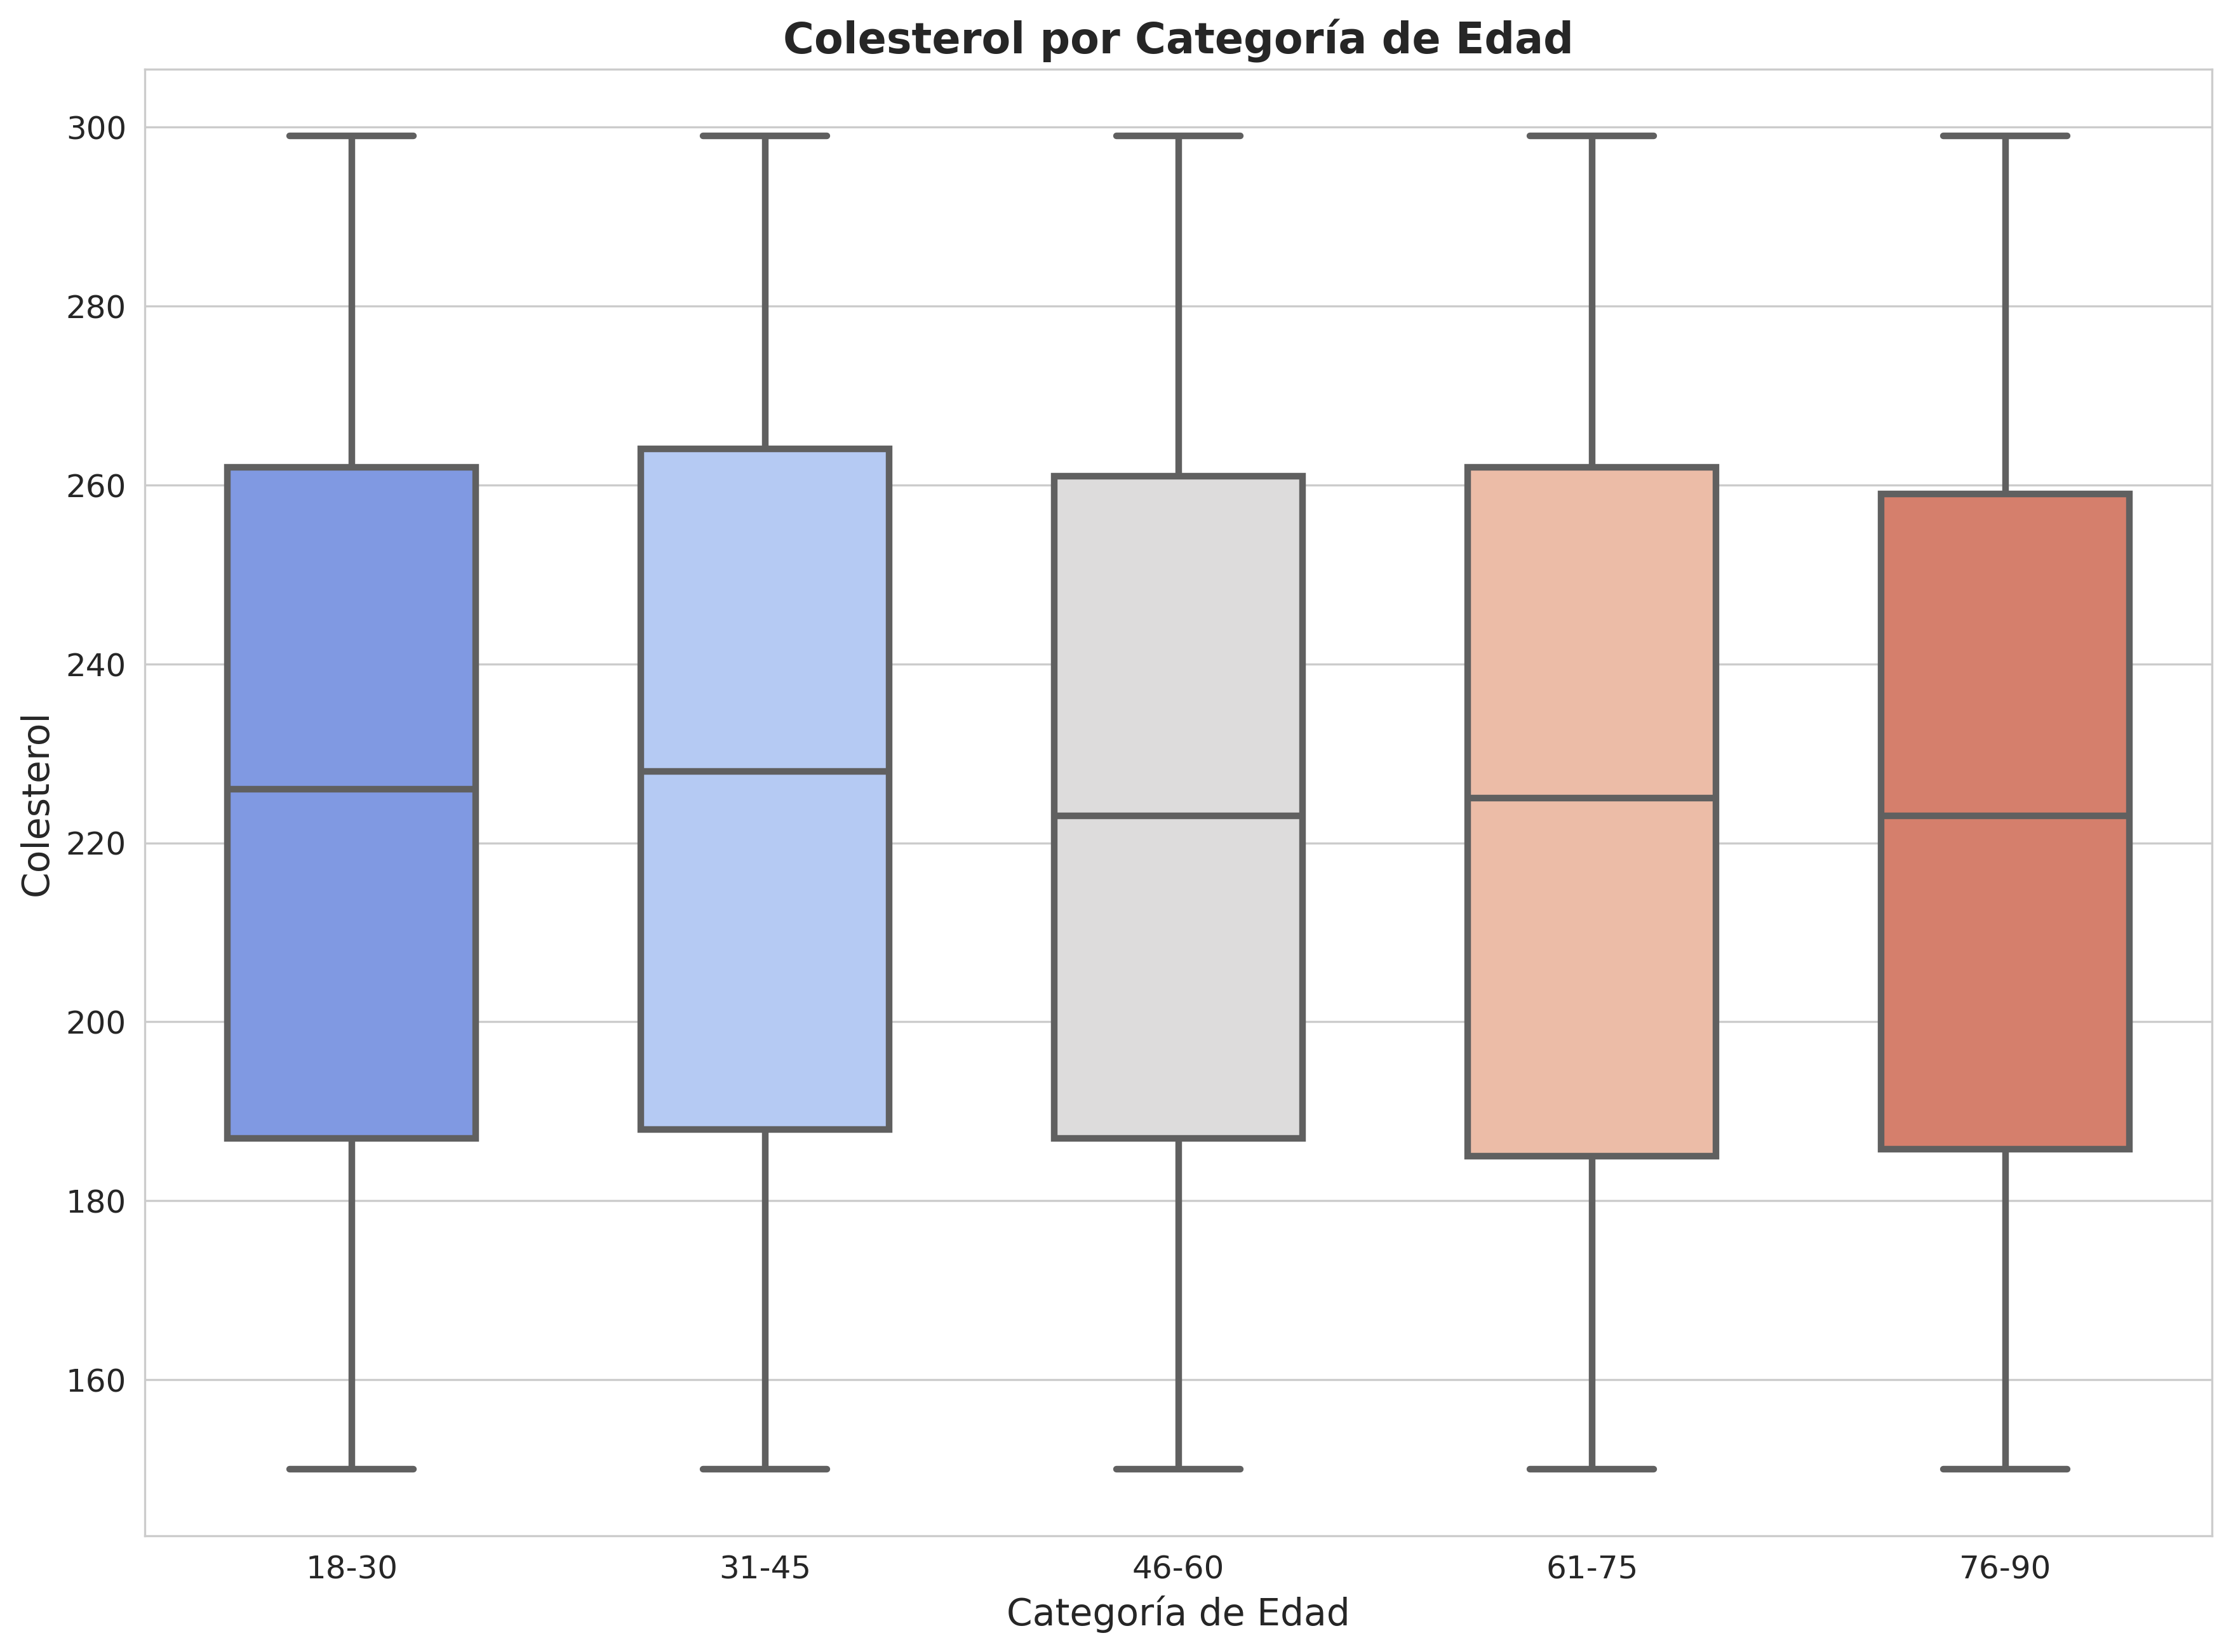

✅ Imagen guardada en: imagenes/Boxplot_de_colesterol_por_categoría_de_edad.png
📂 Archivos en la carpeta: ['Boxplot_de_colesterol_por_categoría de_edad.png', 'Categoria_edad.png', 'Scatterplot_edad_vs_Colesterol.png', 'matriz_correlacion.png', 'Mapa_de_calor.png', 'Histograma_edad.png', 'Boxplot_de_colesterol_por_categoría_de_edad.png']


In [50]:
# Verificar si la variable `output_folder` está definida
if 'output_folder' not in globals():
    output_folder = "imagenes"
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta si no existe

# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Boxplot_de_colesterol_por_categoría_de_edad.png")

#Agrupar edades en rangos para evitar demasiadas categorías
bins = [18, 30, 45, 60, 75, 90]  # Definir los rangos de edad
labels = ["18-30", "31-45", "46-60", "61-75", "76-90"]
df["Age_Category"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Configuración del estilo
sns.set_style("whitegrid")

# Crear la figura con mayor tamaño y calidad
plt.figure(figsize=(14, 10), dpi=300)

#Boxplot con categorías de edad en vez de edad numérica
sns.boxplot(x='Age_Category', y='Cholesterol_Level', data=df, width=0.6, linewidth=2.5, palette="coolwarm")

# Etiquetas y título
plt.title('Colesterol por Categoría de Edad', fontsize=16, fontweight='bold')
plt.xlabel('Categoría de Edad', fontsize=14)
plt.ylabel('Colesterol', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Guardar la imagen con alta calidad
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Mostrar la imagen
plt.show()

# Verificar si la imagen se guardó correctamente
print(f"✅ Imagen guardada en: {image_path}")

# Mostrar archivos dentro de la carpeta "imagenes"
print("📂 Archivos en la carpeta:", os.listdir(output_folder))


**Gráfico de dispersión: Muestra la relación entre la edad y el nivel de colesterol, coloreado por el riesgo de ataque cardíaco.**

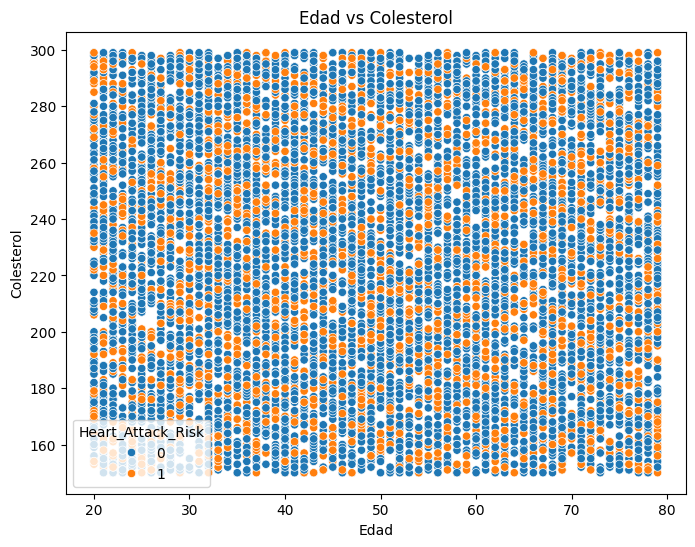

✅ Imagen guardada en: imagenes/Scatterplot_edad_vs_Colesterol.png
📂 Archivos en la carpeta: ['Categoria_edad.png', 'Scatterplot_edad_vs_Colesterol.png', 'matriz_correlacion.png', 'Histograma_edad.png']


In [16]:
# Verificar si la variable `output_folder` está definida
if 'output_folder' not in globals():
    output_folder = "imagenes"
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta si no existe

# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Scatterplot_edad_vs_Colesterol.png")

# Scatterplot Edad vs Colesterol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Cholesterol_Level', hue='Heart_Attack_Risk', data=df)
plt.title('Edad vs Colesterol')
plt.xlabel('Edad')
plt.ylabel('Colesterol')

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Mostrar imagen
plt.show()

# Verificar si la imagen se guardó correctamente
print(f"✅ Imagen guardada en: {image_path}")

# Mostrar archivos dentro de la carpeta "imagenes"
print("📂 Archivos en la carpeta:", os.listdir(output_folder))


**Correlaciòn:** Este mapa de calor, muestra la correlación entre la edad y el nivel de colesterol.

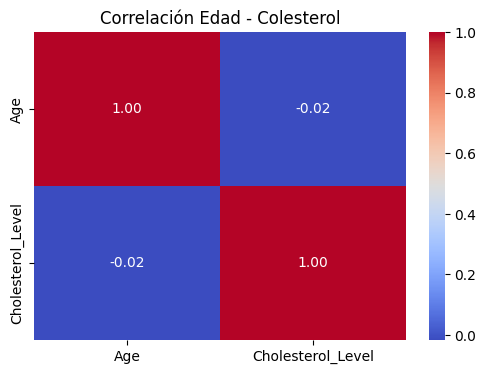

✅ Imagen guardada en: imagenes/Mapa_de_calor.png
📂 Archivos en la carpeta: ['Categoria_edad.png', 'Scatterplot_edad_vs_Colesterol.png', 'matriz_correlacion.png', 'Mapa_de_calor.png', 'Histograma_edad.png']


In [17]:
# Verificar si la variable `output_folder` está definida
if 'output_folder' not in globals():
    output_folder = "imagenes"
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta si no existe

# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Mapa_de_calor.png")

# Gráfico de correlación con mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age', 'Cholesterol_Level']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación Edad - Colesterol")

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

#Mostar imagen
plt.show()

# Verificar si la imagen se guardó correctamente
print(f"✅ Imagen guardada en: {image_path}")

# Mostrar archivos dentro de la carpeta "imagenes"
print("📂 Archivos en la carpeta:", os.listdir(output_folder))

**Graficos de Barra:** Determinar qué factores tienen más impacto en el riesgo de ataque cardíaco

<ipython-input-56-fb10eb6f084f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones.index, y=correlaciones.values, palette='coolwarm')


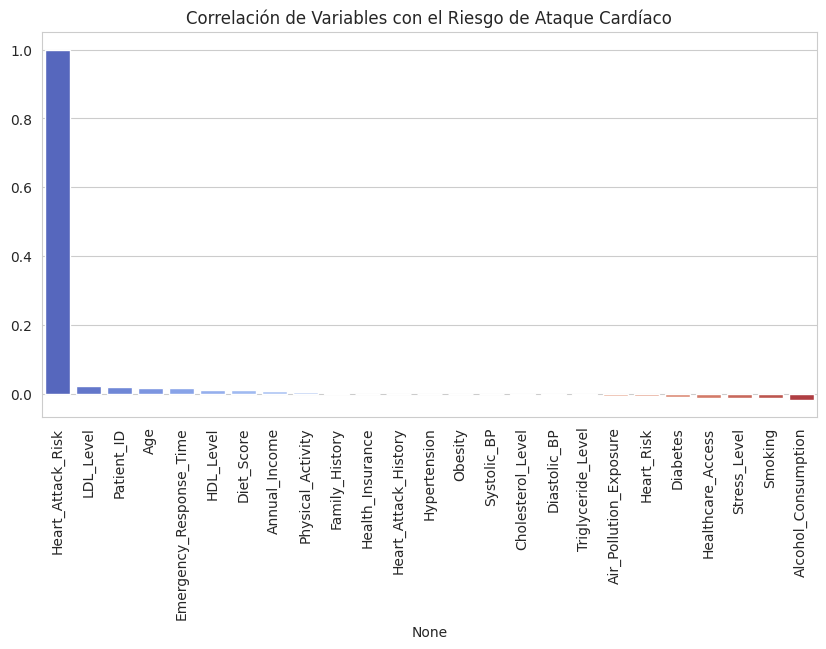

✅ Imagen guardada en: imagenes/Riesgo de ataque cardíaco.png
📂 Archivos en la carpeta: ['Boxplot_de_colesterol_por_categoría de_edad.png', 'iesgo de ataque cardíaco.png', 'Categoria_edad.png', 'Scatterplot_edad_vs_Colesterol.png', 'matriz_correlacion.png', 'Mapa_de_calor.png', 'Riesgo de ataque cardíaco.png', 'Histograma_edad.png', 'Boxplot_de_colesterol_por_categoría_de_edad.png']


In [56]:
# Verificar si la variable `output_folder` está definida
if 'output_folder' not in globals():
    output_folder = "imagenes"
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta si no existe

# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Riesgo de ataque cardíaco.png")
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

# Rellenar valores nulos con la media de cada columna
df_numeric = df_numeric.fillna(df_numeric.mean())

# Calcular correlaciones con el riesgo de ataque cardíaco
correlaciones = df_numeric.corr()['Heart_Attack_Risk'].sort_values(ascending=False)

# Visualizar correlaciones más altas
plt.figure(figsize=(10, 5))
sns.barplot(x=correlaciones.index, y=correlaciones.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Correlación de Variables con el Riesgo de Ataque Cardíaco")

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

#Mostar imagen
plt.show()

# Verificar si la imagen se guardó correctamente
print(f"✅ Imagen guardada en: {image_path}")

# Mostrar archivos dentro de la carpeta "imagenes"
print("📂 Archivos en la carpeta:", os.listdir(output_folder))

**Comparar porcentajes de ataques cardíacos en hombres y mujeres: Identifica si los hombres tienen más riesgo de ataque cardíaco que las mujeres.**

📊 Porcentaje de ataques cardíacos por género:
Gender
Female    0.296610
Male      0.304025
Name: Heart_Attack_Risk, dtype: float64


<ipython-input-59-ec211e3c760c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_heart_attack.index, y=gender_heart_attack.values, palette="pastel")


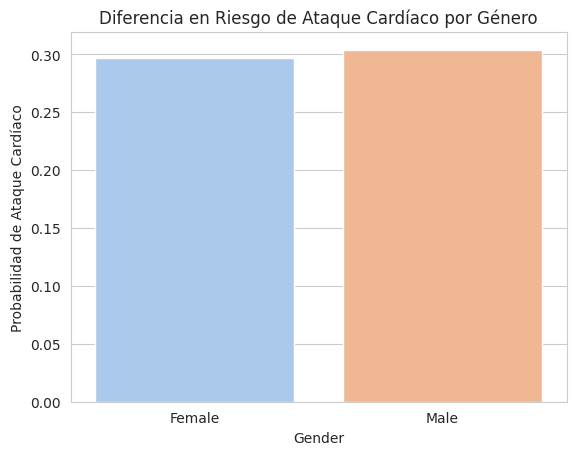

In [59]:
# Verificar si la variable `output_folder` está definida
if 'output_folder' not in globals():
    output_folder = "imagenes"
    os.makedirs(output_folder, exist_ok=True)  # Crear la carpeta si no existe

# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Ataque cardíaco por genero.png")

# Comparación de ataques cardíacos por género
gender_heart_attack = df.groupby('Gender')['Heart_Attack_Risk'].mean()

# Mostrar resultados
print("📊 Porcentaje de ataques cardíacos por género:")
print(gender_heart_attack)

# Graficar la diferencia
sns.barplot(x=gender_heart_attack.index, y=gender_heart_attack.values, palette="pastel")
plt.title("Diferencia en Riesgo de Ataque Cardíaco por Género")
plt.ylabel("Probabilidad de Ataque Cardíaco")

# Guardar la imagen correctamente en la carpeta "imagenes"
plt.savefig(image_path, dpi=300, bbox_inches='tight')

#Mostar imagen
plt.show()


**Relación entre el estilo de vida y el riesgo cardíaco: Cómo afectan el tabaquismo.**

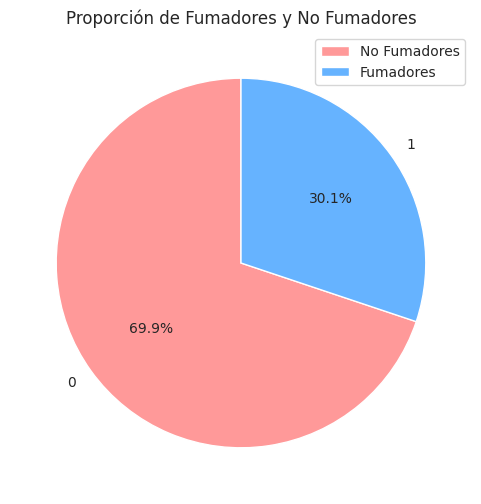

In [61]:
# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Proporción de Fumadores y No Fumadores.png")

# Contar la cantidad de fumadores y no fumadores
data_pie = df['Smoking'].value_counts()

# Crear gráfico de torta con leyenda
plt.figure(figsize=(6, 6))
colors = ['#ff9999', '#66b3ff']  # Definir colores
patches, texts, autotexts = plt.pie(data_pie, labels=data_pie.index, autopct='%1.1f%%',
                                    colors=colors, startangle=90)

# Agregar leyenda
plt.legend(patches, ['No Fumadores', 'Fumadores'], loc="best")

# Título del gráfico
plt.title("Proporción de Fumadores y No Fumadores")

# Guardar la imagen en la carpeta de salida
plt.savefig(image_path, dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()



**Impacto de la presión arterial en el riesgo de ataque cardíaco: Determina si una presión arterial alta es un predictor fuerte de ataques cardíacos.**

<ipython-input-60-ee48b92c6b0a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Heart_Attack_Risk", y="Systolic_BP", data=df, palette="magma")


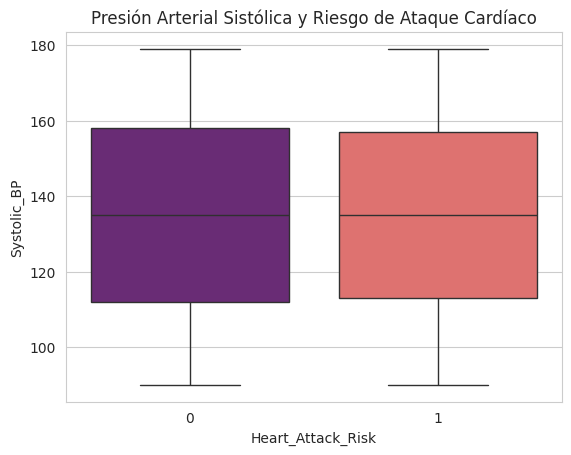

In [60]:
# Ruta completa donde se guardará la imagen
image_path = os.path.join(output_folder, "Presiòn arterial y Riesgo de Ataque Cardíaco.png")

sns.boxplot(x="Heart_Attack_Risk", y="Systolic_BP", data=df, palette="magma")
plt.title("Presión Arterial Sistólica y Riesgo de Ataque Cardíaco")
# Guardar la imagen en la carpeta de salida
plt.savefig(image_path, dpi=300, bbox_inches='tight')

plt.show()

**Tabla del nivel promedio de colesterol para diferentes grupos de edad**

In [ ]:
# Promedio de colesterol por categoría de edad
cholesterol_by_age = df.groupby('Age_Category')['Cholesterol_Level'].mean().reset_index()

# Mostrar en formato de tabla ordenada
print("\n📊 Promedio de colesterol por categoría de edad:")
display(cholesterol_by_age)


📊 Promedio de colesterol por categoría de edad:


<ipython-input-15-daab0321ea04>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cholesterol_by_age = df.groupby('Age_Category')['Cholesterol_Level'].mean().reset_index()


,Age_Category,Cholesterol_Level
0,18-30,224.380049
1,31-40,227.048461
2,41-50,225.220772
3,51-60,224.469312
4,60+,223.622209


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Selección de variables
X = df[['Age', 'Systolic_BP', 'Cholesterol_Level']]
y = df['Heart_Risk']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Convertir el reporte de clasificación en un DataFrame
df_report = pd.DataFrame(report).transpose()

# Mostrar tabla de métricas
print("\n📊 Reporte de Clasificación:")
display(df_report)

# Crear un DataFrame para la precisión del modelo
df_accuracy = pd.DataFrame({'Métrica': ['Precisión'], 'Valor': [accuracy]})

# Mostrar tabla de precisión
print("\n📊 Precisión del Modelo:")
display(df_accuracy)



📊 Reporte de Clasificación:


,precision,recall,f1-score,support
0,0.559701,0.375000,0.449102,200.000
1,0.933012,0.967222,0.949809,1800.000
accuracy,0.908000,0.908000,0.908000,0.908
macro avg,0.746357,0.671111,0.699455,2000.000
weighted avg,0.895681,0.908000,0.899738,2000.000



📊 Precisión del Modelo:


,Métrica,Valor
0,Precisión,0.908


from matplotlib import pyplot as plt
df_report['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_report['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_report['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_report['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_report['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['f1-score'].plot(kind='hist', bins=20, title='f1-score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='recall', y='f1-score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='f1-score', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['f1-score'].plot(kind='line', figsize=(8, 4), title='f1-score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='precision', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='recall', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='f1-score', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='support', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

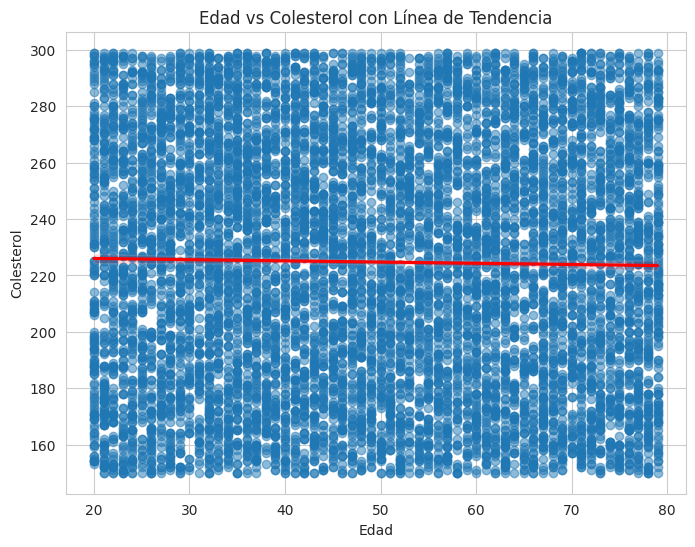

In [44]:
plt.figure(figsize=(8,6))
sns.regplot(x=df['Age'], y=df['Cholesterol_Level'], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Edad vs Colesterol con Línea de Tendencia')
plt.xlabel('Edad')
plt.ylabel('Colesterol')

# Mostrar gráfico
plt.show()


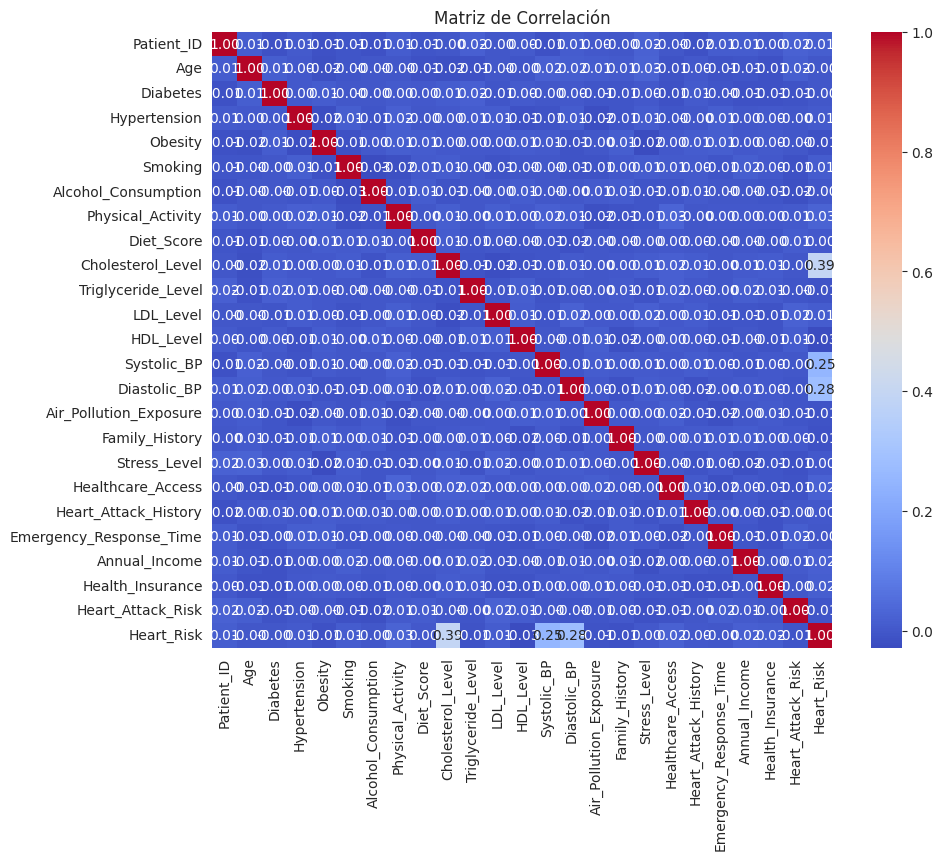

In [46]:
df_numeric = df.select_dtypes(include=['number'])  # Solo columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
